In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

df = pd.read_csv("./airfare_1993_2021.csv")

/Users/tongchenhe/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df.count()

airport                            940
city                               940
Average Fare                       940
Inflation Adjusted Average Fare    940
year                               940
quarter                            940
dtype: int64

In [3]:
labels =['0-100', '100-200', '200-300', '300-500', '500-800', '>800']
df['bin_avg'] = pd.cut(df['Average Fare'], [0, 90, 200, 300, 500, 800, 5000], labels=labels)

df.head()

,airport,city,Average Fare,Inflation Adjusted Average Fare,year,quarter,bin_avg
0,HNL,Honolulu,103.28,211.15,1993,1,100-200
1,OGG,Kahului,48.83,99.84,1993,1,0-100
2,KOA,Kona,45.96,93.98,1993,1,0-100
3,LIH,Lihue,48.21,98.56,1993,1,0-100
4,ITO,Hilo,42.72,87.34,1993,1,0-100


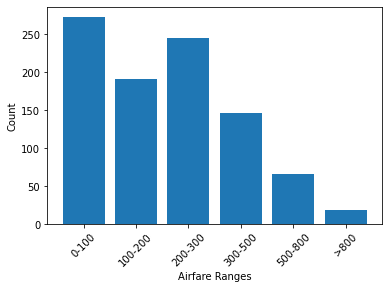

In [4]:
plt.bar(x=labels, height=df['bin_avg'].value_counts().sort_index())
plt.xlabel("Airfare Ranges")
plt.ylabel("Count")
plt.xticks(rotation=45)

plt.savefig('Avg_fare_bin_count.png',bbox_inches="tight")

In [5]:
y = df['bin_avg']
X = df[['airport', 'city', 'year', 'quarter']]
X_dummy = pd.get_dummies(X, columns=['airport', 'city'])

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_dummy, y, random_state=20)

In [7]:
clf = RandomForestClassifier(random_state=22, n_estimators=1218).fit(X_train, y_train)

In [8]:
clf.score(X_test, y_test)

0.7829787234042553

In [9]:
def predict(airport, city, year, quarter):
    new_row = {'airport':[airport], 'city':[city], 'year':[year], 'quarter':[quarter]}
    new_X = pd.concat([X, pd.DataFrame(new_row)], ignore_index=True)
    print(f"The predicted average price range for airport {airport} in quarter {quarter} of {year} is {clf.predict(pd.get_dummies(new_X, columns=['airport', 'city']).tail(1))[0]} dollars")

In [10]:
predict('OGG', 'Kahului', 2023, 1)
predict('HNL', 'Honolulu', 2023, 3)

The predicted average price range for airport OGG in quarter 1 of 2023 is 300-500 dollars
The predicted average price range for airport HNL in quarter 3 of 2023 is 200-300 dollars
